In [1]:
!pip install roboflow
!pip install wandb==0.15.12
!pip install ultralytics==8.0.186

  Using cached wandb-0.15.12-py3-none-any.whl (2.1 MB)
  Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.6/281.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=64de6a66e8b36654f7a0eedc926778646639da9d0872a196c03ba200aab96057
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools
  Using cached ultralytics-8.0.186-py3-none-any.whl (618 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_6

# Download Dataset

 I downloaded the dataset from Kaggle, and re-upload it to Roboflow. This dataset contains 807 images with 3,856 bounding boxes of 3 classes:
* `mask_weared_incorrect`
* `with_mask`
* `without_mask`

After augmentations, the adataset are multiplied 3x into a total of 1,937 images.

**Note**: You need to insert your Roboflow API key to run the cell below.

In [2]:
from getpass import getpass
from roboflow import Roboflow

rf = Roboflow(api_key=getpass())
project = rf.workspace("manfred-michael").project("face-mask-detection-4zoki")
version = project.version(1)
dataset = version.download("yolov8")

··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.186, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Face-Mask-Detection-1 in yolov8:: 100%|██████████| 3886/3886 [00:01<00:00, 2398.11it/s]


The dataset would be splitted into 3 parts when we download it.

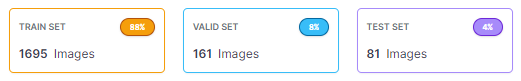

All images in this dataset are already resized into 640x640 and it also includes augmented samples. So, I don't need to do any data preparation. Roboflow handled everything for me.


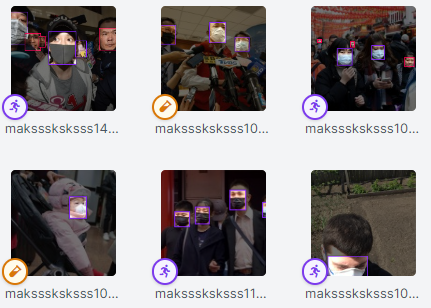

# Model Training

I will use ultralytics to train YOLOv8, and WandB to monitor the training process. This wandb tracking implementation includes some advanced features that we will see shortly.

In [ ]:
# !pip install wandb

In [3]:
import wandb
from wandb.integration.ultralytics import add_wandb_callback
from PIL import Image

from ultralytics import YOLO

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")



In [ ]:
wandb.init(project="verihubs-tech-assessment", job_type="training")

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


I trained YOLOv8 for 10 epochs.

In [ ]:
# Initialize YOLO Model
model = YOLO("yolov8m.pt")

# Add Weights & Biases callback for Ultralytics
add_wandb_callback(model, enable_model_checkpointing=True)

# Train/fine-tune model
model.train(project="verihubs-tech-assessment", data='/content/Face-Mask-Detection-1/data.yaml', epochs=80, device=[0])
model.val()

# Finish the W&B run
wandb.finish()

Output streaming akan dipotong hingga 5000 baris terakhir.
      28/80      8.54G       1.09      0.576      1.107         71        640: 100%|██████████| 106/106 [00:59<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]
                   all        161        861      0.842      0.769      0.808      0.518

image 1/1 /content/Face-Mask-Detection-1/valid/images/maksssksksss301_png.rf.79b160619414ca6a470bd5ea8b30ef4a.jpg: 640x640 22 with_masks, 5 without_masks, 47.9ms
Speed: 1.7ms preprocess, 47.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train

image 1/1 /content/Face-Mask-Detection-1/valid/images/maksssksksss303_png.rf.f00ae35b4058b933e066d1d2a4d88c17.jpg: 640x640 4 with_masks, 37.2ms
Speed: 2.0ms preprocess, 37.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train

image 1/1 /con

# Model Evaluation

### Evaluate on test set

In [9]:
model = YOLO('best.pt', task='detect')

In [11]:
model.val()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
100%|██████████| 755k/755k [00:00<00:00, 62.4MB/s]
val: Scanning /content/Face-Mask-Detection-1/valid/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<00:00, 1699.32it/s]
val: New cache created: /content/Face-Mask-Detection-1/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
                   all        161        861        0.9      0.772      0.837      0.547
 mask_weared_incorrect        161         28      0.891      0.643      0.735      0.486
             with_mask        161        720      0.935      0.902      0.944      0.648
          without_mask        161        113      0.876       0.77      0.831      0.508
Speed: 5.0ms preprocess, 22.5ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0dd57b3550>
fitness: 0.5763262590985345
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.4858,      0.6481,     0.50819])
names: {0: 'mask_weared_incorrect', 1: 'with_mask', 2: 'without_mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.9004291228691308, 'metrics/recall(B)': 0.7716073384676143, 'metrics/mAP50(B)': 0.8370097832892117, 'metrics/mAP50-95(B)': 0.5473614230773481, 'fitness': 0.5763262590985345}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 5.027679182727885, 'inference': 22.499906350366818, 'loss': 0.001861441949879901, 'postprocess': 7.183861288224689}

When I tested the model on test set, I got 83.7% mAP@50 and 54.7% map@50-95 on all classess.


See the inference results here https://wandb.ai/anakbangkit/verihubs-tech-assessment/reports/AI-Engineer-Study-Case-Report-Manfred-Michael--Vmlldzo4MDYxNjkx

> **Note**: From the wandb report above, we could see that the incorrectly weared mask is the hardest to detect.

### WandB Tracking Results

You can see the full report here - https://wandb.ai/anakbangkit/verihubs-tech-assessment/reports/AI-Engineer-Study-Case-Report-Manfred-Michael--Vmlldzo4MDYxNjkx

#### Confusion Matrix

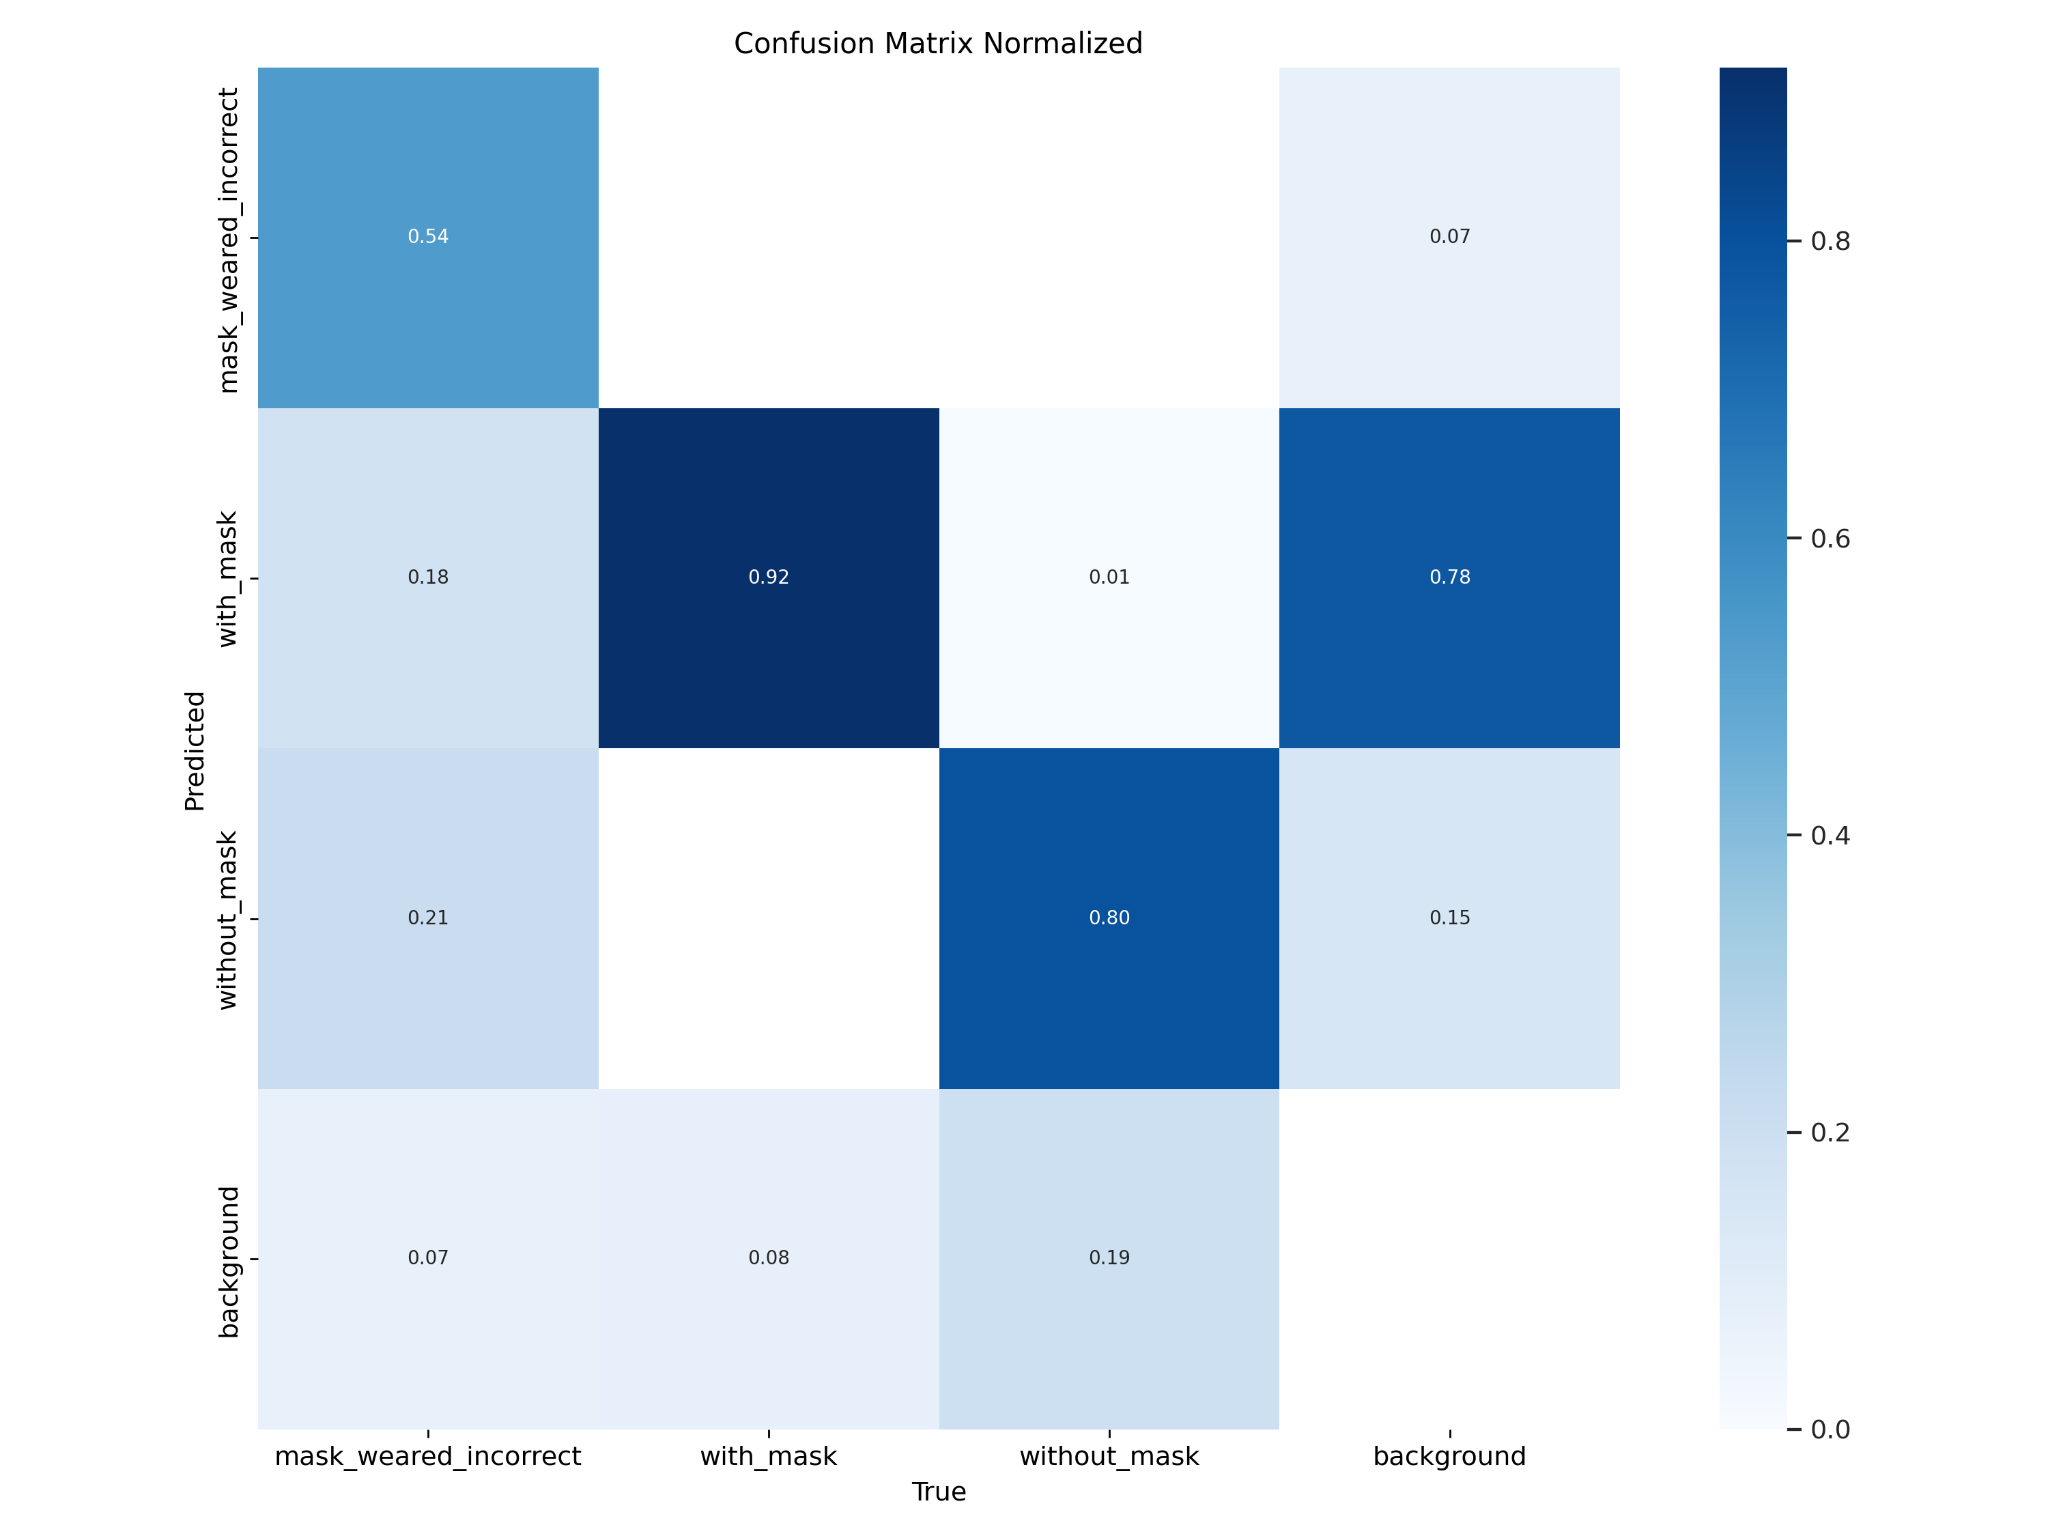

#### mean Average Precision

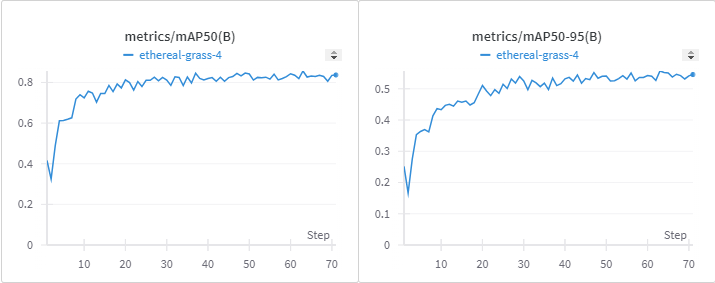

# Calculate Inference Speed

In [24]:
wandb.init(project="verihubs-tech-assessment", job_type="evaluation")

In [25]:
model_best = YOLO('/content/best.pt', task='detect')

In [26]:
import glob
test_img_paths = glob.glob("/content/test-images/*")

imgs = [Image.open(path) for path in test_img_paths]

results = model_best(imgs)


0: 640x640 2 with_masks, 1: 640x640 3 with_masks, 2: 640x640 3 with_masks, 1 without_mask, 3: 640x640 1 mask_weared_incorrect, 4: 640x640 5 mask_weared_incorrects, 2 with_masks, 1 without_mask, 157.9ms
Speed: 2.8ms preprocess, 31.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [27]:
for result in results:
    print(result.path)
    print(result.speed)

/content/test-images/106757648-1603404475911-gettyimages-1281710356-nng_6210_2020102252211420.jpeg
{'preprocess': 2.7736663818359375, 'inference': 31.577253341674805, 'postprocess': 1.3605594635009766}
/content/test-images/download (1).jpg
{'preprocess': 2.7736663818359375, 'inference': 31.577253341674805, 'postprocess': 1.3605594635009766}
/content/test-images/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.webp
{'preprocess': 2.7736663818359375, 'inference': 31.577253341674805, 'postprocess': 1.3605594635009766}
/content/test-images/download (2).jpg
{'preprocess': 2.7736663818359375, 'inference': 31.577253341674805, 'postprocess': 1.3605594635009766}
/content/test-images/images (5).jpg
{'preprocess': 2.7736663818359375, 'inference': 31.577253341674805, 'postprocess': 1.3605594635009766}


Here we get 31ms latency on inference

# Reduce Inference Speed


### Quantize the model

In this step, I will export the model with int8 quantization.

In [28]:
model_best.export(format='torchscript', int8=True)

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (296.6 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 8.3s, saved as '/content/best.torchscript' (99.1 MB)

Export complete (11.5s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.torchscript imgsz=640 int8 
Validate:        yolo val task=detect model=/content/best.torchscript imgsz=640 data=/content/Face-Mask-Detection-1/data.yaml int8 
Visualize:       https://netron.app


'/content/best.torchscript'

In [29]:
wandb.init(project="verihubs-tech-assessment", job_type="evaluation")

model_int8 = YOLO('/content/best.torchscript', task='detect')
add_wandb_callback(model_int8, enable_model_checkpointing=True)

YOLO()

In [30]:
imgs = [Image.open(path) for path in test_img_paths]
results = model_int8(imgs)

Loading /content/best.torchscript for TorchScript inference...

0: 640x640 2 with_masks, 1: 640x640 3 with_masks, 2: 640x640 3 with_masks, 1 without_mask, 3: 640x640 1 mask_weared_incorrect, 4: 640x640 5 mask_weared_incorrects, 2 with_masks, 1 without_mask, 109.6ms
Speed: 2.2ms preprocess, 21.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
for result in results:
    print(result.path)
    print(result.speed)

/content/test-images/106757648-1603404475911-gettyimages-1281710356-nng_6210_2020102252211420.jpeg
{'preprocess': 2.2184371948242188, 'inference': 21.917200088500977, 'postprocess': 1.1716365814208984}
/content/test-images/download (1).jpg
{'preprocess': 2.2184371948242188, 'inference': 21.917200088500977, 'postprocess': 1.1716365814208984}
/content/test-images/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.webp
{'preprocess': 2.2184371948242188, 'inference': 21.917200088500977, 'postprocess': 1.1716365814208984}
/content/test-images/download (2).jpg
{'preprocess': 2.2184371948242188, 'inference': 21.917200088500977, 'postprocess': 1.1716365814208984}
/content/test-images/images (5).jpg
{'preprocess': 2.2184371948242188, 'inference': 21.917200088500977, 'postprocess': 1.1716365814208984}


After quantization, we get 21ms on inference. 29% reduction in inference time!

### Evaluate after quantization

Now let's test the model after quantizatoin

In [32]:
model_int8 = YOLO('/content/best.torchscript', task='detect')
model_int8.val(data='/content/Face-Mask-Detection-1/data.yaml', imgsz=640)

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Loading /content/best.torchscript for TorchScript inference...
val: Scanning /content/Face-Mask-Detection-1/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.28it/s]
                   all        161        861      0.847      0.795      0.829      0.543
 mask_weared_incorrect        161         28      0.809      0.679      0.722      0.482
             with_mask        161        720      0.912       0.91      0.939      0.639
          without_mask        161        113      0.818      0.796      0.825      0.506
Speed: 4.7ms preprocess, 19.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0ccecef5b0>
fitness: 0.571245528142035
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.48219,     0.63923,     0.50649])
names: {0: 'mask_weared_incorrect', 1: 'with_mask', 2: 'without_mask'}
plot: True
results_dict: {'metrics/precision(B)': 0.846657158388935, 'metrics/recall(B)': 0.7949851975707888, 'metrics/mAP50(B)': 0.8287328115265163, 'metrics/mAP50-95(B)': 0.5426358299882038, 'fitness': 0.571245528142035}
save_dir: PosixPath('runs/detect/val3')
speed: {'preprocess': 4.6583658419780845, 'inference': 19.83749052012189, 'loss': 0.03296692178856512, 'postprocess': 1.5373052277179977}

Now we get 82.9% mAP@50 and 54.4% map@50-95. A very similar performance with only 2/3 of the original inference time!